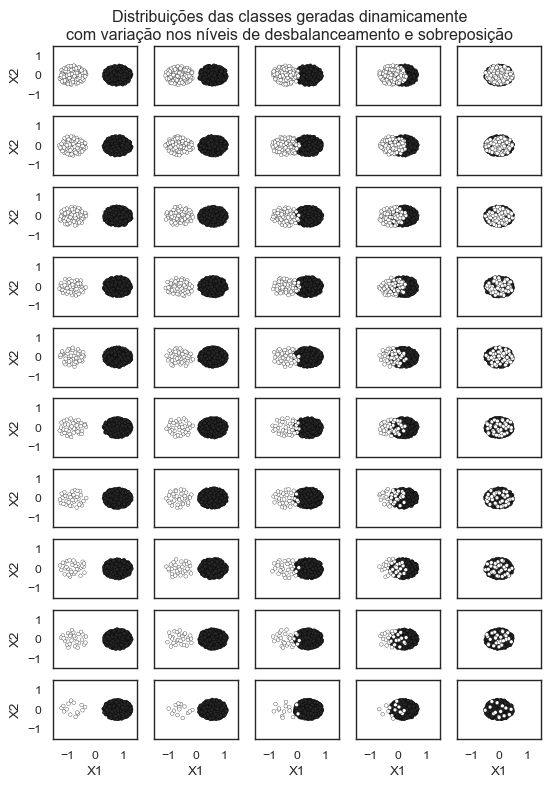

In [31]:
import os
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

class_ratios = [
    # '1:1',
    '1:2', '1:3', '1:4', '1:5', '1:6',
    '1:7', '1:8', '1:9', '1:10', '1:20'
]
class_1_centers = [f'{i/10}, 0' for i in range(-8, 2, 2)]
class_1_radius = '0.5, 0.5'
class_2_centers = [f'{i/10}, 0' for i in range(8, -2, -2)]
sample_size = 300

total_ratios = len(class_ratios)
total_centers = len(class_1_centers)

sns.set_style('white')
sns.set_context("paper", font_scale = 1)
fig, axs = plt.subplots(
    total_ratios,
    total_centers,
    sharex='all',
    sharey='all',
    figsize=(6.29707, 9)
)
fig.suptitle(
    (
        'Distribuições das classes geradas dinamicamente\n'
        'com variação nos níveis de desbalanceamento e sobreposição'
    ),
    y=0.92
)
plt.ylim(-1.5, 1.5)
plt.xlim(-1.5, 1.5)

for i_ratios, ratio in enumerate(class_ratios):
    rationame = ratio.replace(':', 'to')
    for i in range(len(class_1_centers)):

        class_1_center = class_1_centers[i]
        class_2_center = class_2_centers[i]
        distance = str(
            abs(
                float(class_1_center.split(',')[0]) \
                - float(class_2_center.split(',')[0])
            )
        ).replace('.', '_')
        dataset = f'spheres-2d-samples={sample_size}-ratio={rationame}-distance={distance}'

        # CONF_STRING = f"""
        #     # {dataset}
        #     attributes = 2
        #     classes = 2
        #     classRatio = {ratio}

        #     names.attributes = X1, X2
        #     names.classes = 1, 0
        #     names.decision = Class
        #     minOutlierDistance = 0

        #     defaultRegion.weight = 1
        #     defaultRegion.distribution = U
        #     defaultRegion.noOutlierZone = 0


        #     # MIN CLASS (1)
        #     class.1.regions = 1
        #     class.1.region.1.shape = C
        #     class.1.region.1.center = {class_1_center}
        #     class.1.region.1.radius = {class_1_radius}


        #     # MAJ CLASS (0)
        #     class.2.regions = 1
        #     class.2.region.1.shape = C
        #     class.2.region.1.center = {class_2_center}
        #     class.2.region.1.radius = 0.5, 0.5

        #     examples={sample_size}
        #     fileName=data/{dataset}.arff
        # """
        # with open(f'data/{dataset}.conf', 'w') as f:
        #     f.write(CONF_STRING)

        # os.system(f'java -jar data/datagenerator/experiments/DataGenSW.jar -config data/{dataset}.conf')

        data = arff.loadarff(f'data/{dataset}.arff')
        df = pd.DataFrame(data[0])
        df['Class'] = df['Class'].astype(int)
    
        df.loc[df['Class'] == 1, 'Top'] = 2
        df.loc[df['Class'] == 0, 'Top'] = 1
        df = df.sort_values(by=['Top'], ascending=True) 
        import itertools
        mks = itertools.cycle(['o', '+'])
        markers = [next(mks) for i in df["Class"].unique()]
        sns.scatterplot(
            data=df,
            x="X1",
            y="X2",
            hue="Class",
            # hue_order=['MIN', 'MAJ'],
            ax=axs[i_ratios, i],
            markers=markers,
            palette='dark:white',
            edgecolor='black',
            legend=False,
            s=7
        )
        # os.system(f'python run_notebook.py --dataset_path "data/{dataset}.arff"')

plt.show()